In [1]:
import pandas as pd

df = pd.read_csv("../data/raw/nsi_employment_by_sector.csv", encoding="utf-8")
print(df.head())
print(df.shape)


  RevisionColumn NACE2008A21   Units periods  GenderID ValueColumn
0            r_3           0  1000cp  2008Q1         0      3289.9
1            r_3           0  1000cp  2008Q1         1      1749.1
2            r_3           0  1000cp  2008Q1         2      1540.7
3            r_3           0  1000cp  2008Q2         0      3372.1
4            r_3           0  1000cp  2008Q2         1      1794.4
(4260, 6)


In [2]:
import pandas as pd

df = pd.read_csv("../data/raw/nsi_employment_by_sector.csv")

df["ValueColumn"] = pd.to_numeric(df["ValueColumn"], errors="coerce")

print("shape:", df.shape)
print("periods:", df["periods"].unique()[:10])
print(df.head())

shape: (4260, 6)
periods: <StringArray>
['2008Q1', '2008Q2', '2008Q3', '2008Q4', '2009Q1', '2009Q2', '2009Q3',
 '2009Q4', '2010Q1', '2010Q2']
Length: 10, dtype: str
  RevisionColumn NACE2008A21   Units periods  GenderID  ValueColumn
0            r_3           0  1000cp  2008Q1         0       3289.9
1            r_3           0  1000cp  2008Q1         1       1749.1
2            r_3           0  1000cp  2008Q1         2       1540.7
3            r_3           0  1000cp  2008Q2         0       3372.1
4            r_3           0  1000cp  2008Q2         1       1794.4


In [3]:
last_period = df["periods"].max()
print("Последен период:", last_period)

df_last = df[df["periods"] == last_period]

total = (
df_last[df_last["GenderID"] == 0]
.groupby("NACE2008A21")["ValueColumn"]
.sum()
.sort_values(ascending=False)
)

print(total.head(10))

Последен период: 2025Q3
NACE2008A21
0    2956.0
G     516.3
C     470.0
F     225.7
O     224.8
Q     197.4
H     193.5
P     187.2
I     146.5
M     145.1
Name: ValueColumn, dtype: float64


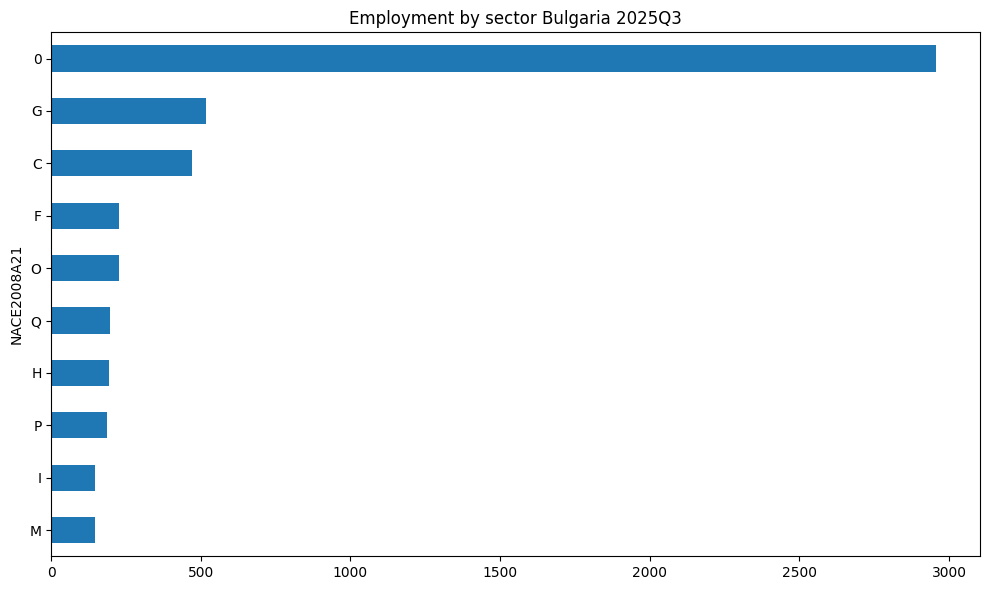

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
total.head(10).sort_values().plot(kind="barh")
plt.title(f"Employment by sector Bulgaria {last_period}")
plt.tight_layout()
plt.savefig("../reports/figures/nsi_top_sectors.png")
plt.show()

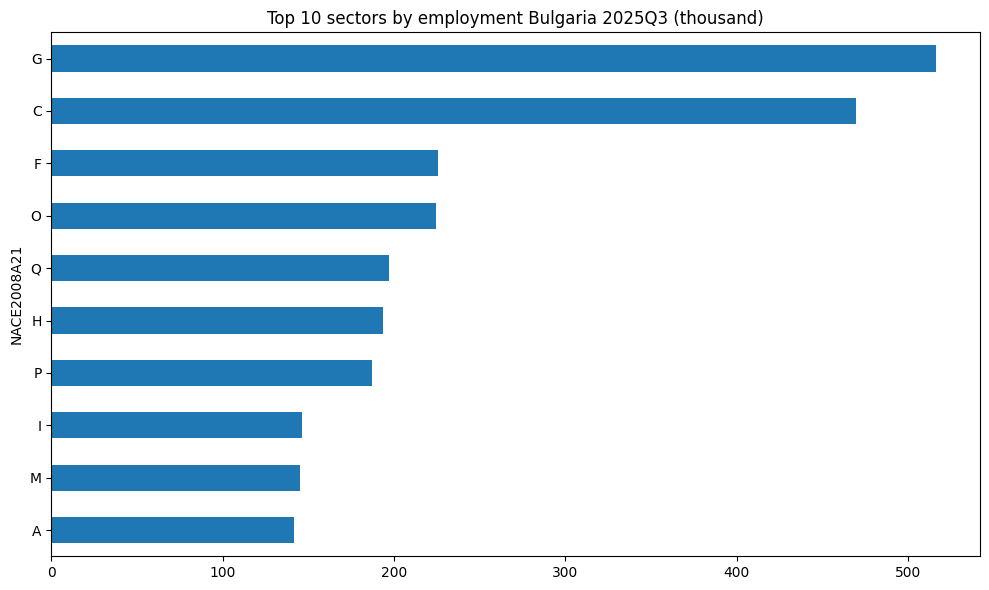

saved: reports/figures/nsi_top10_sectors_no_total.png
NACE2008A21
G    516.3
C    470.0
F    225.7
O    224.8
Q    197.4
H    193.5
P    187.2
I    146.5
M    145.1
A    141.8
Name: ValueColumn, dtype: float64


In [5]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("../data/raw/nsi_employment_by_sector.csv")
df["ValueColumn"] = pd.to_numeric(df["ValueColumn"], errors="coerce")

last_period = df["periods"].max()
df_last = df[(df["periods"] == last_period) & (df["GenderID"] == 0)].copy()

total = (
    df_last.groupby("NACE2008A21")["ValueColumn"]
    .sum()
    .sort_values(ascending=False)
)

total_no_total = total.drop(index="0", errors="ignore")

top10 = total_no_total.head(10)

plt.figure(figsize=(10,6))
top10.sort_values().plot(kind="barh")
plt.title(f"Top 10 sectors by employment Bulgaria {last_period} (thousand)")
plt.tight_layout()
plt.savefig("../reports/figures/nsi_top10_sectors_no_total.png")
plt.show()

print("saved: reports/figures/nsi_top10_sectors_no_total.png")
print(top10)


Project Bulgarian Labour Market Analysis
Source National Statistical Institute Bulgaria
Goal Employment trends by sector education region

In [7]:
import pandas as pd

edu = pd.read_csv("../data/raw/nsi_employment_by_education.csv")

print(edu.head())
print(edu.shape)
print(edu.columns)

  RevisionColumn LFS_EDUlevel   Units periods Age10_LFS  ValueColumn
0            r_2            0  1000cp  2003Q1         0       2704.3
1            r_2            0  1000cp  2003Q2         0       2876.0
2            r_2            0  1000cp  2003Q3         0       2933.1
3            r_2            0  1000cp  2003Q4         0       2825.6
4            r_2            0  1000cp  2004Q1         0       2783.8
(1274, 6)
Index(['RevisionColumn', 'LFS_EDUlevel', 'Units', 'periods', 'Age10_LFS',
       'ValueColumn'],
      dtype='str')


last_period: 2025Q3


IndexError: index 0 is out of bounds for axis 0 with size 0

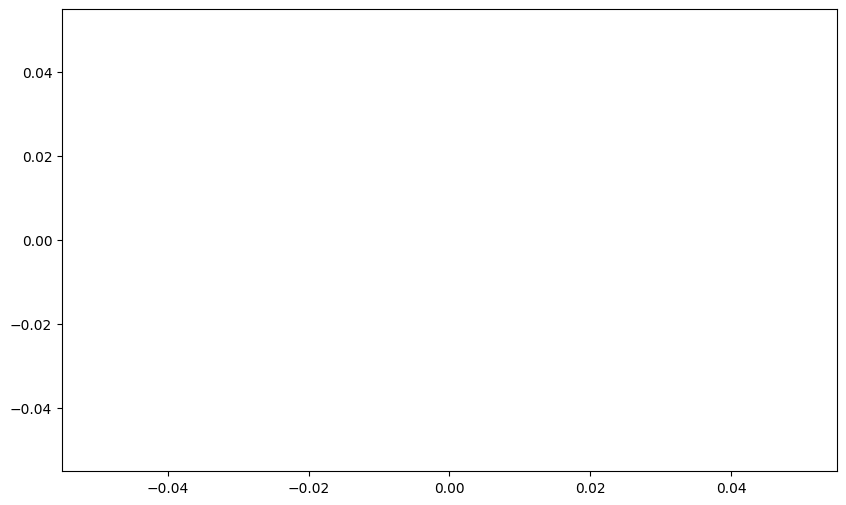

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

edu = pd.read_csv("../data/raw/nsi_employment_by_education.csv")
edu["ValueColumn"] = pd.to_numeric(edu["ValueColumn"], errors="coerce")

last_period = edu["periods"].max()
print("last_period:", last_period)

# Филтър: обща възрастова група (обикновено 0) и последен период
edu_last = edu[(edu["periods"] == last_period) & (edu["Age10_LFS"] == 0)].copy()

top = (
    edu_last.groupby("LFS_EDUlevel")["ValueColumn"]
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))
top.sort_values().plot(kind="barh")
plt.title(f"Employment by education Bulgaria {last_period} (thousand)")
plt.tight_layout()
plt.savefig("../reports/figures/nsi_education_last_period.png")
plt.show()

print(top)


last_period: 2025Q3


IndexError: index 0 is out of bounds for axis 0 with size 0

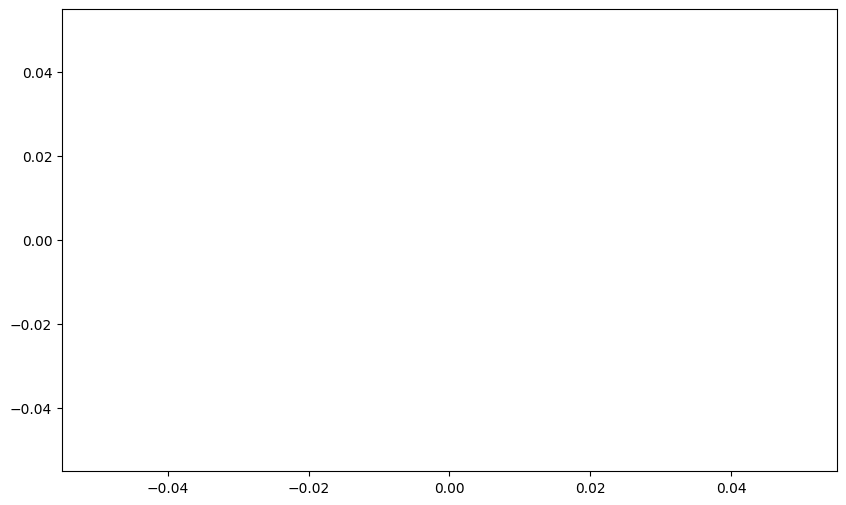

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

edu = pd.read_csv("../data/raw/nsi_employment_by_education.csv")
edu["ValueColumn"] = pd.to_numeric(edu["ValueColumn"], errors="coerce")

last_period = edu["periods"].max()
print("last_period:", last_period)

# Филтър: обща възрастова група (обикновено 0) и последен период
edu_last = edu[(edu["periods"] == last_period) & (edu["Age10_LFS"] == 0)].copy()

top = (
    edu_last.groupby("LFS_EDUlevel")["ValueColumn"]
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))
top.sort_values().plot(kind="barh")
plt.title(f"Employment by education Bulgaria {last_period} (thousand)")
plt.tight_layout()
plt.savefig("../reports/figures/nsi_education_last_period.png")
plt.show()

print(top)


In [10]:
print("last period:", edu["periods"].max())
print("unique Age groups:", edu["Age10_LFS"].unique())
print("unique education levels:", edu["LFS_EDUlevel"].unique())


last period: 2025Q3
unique Age groups: <StringArray>
['0', '15 - 64_gr']
Length: 2, dtype: str
unique education levels: <StringArray>
['0', '1', '2', '2_1', '2_2', '3', '4']
Length: 7, dtype: str


In [11]:
edu[edu["periods"] == edu["periods"].max()].head(20)



,RevisionColumn,LFS_EDUlevel,Units,periods,Age10_LFS,ValueColumn
1260,r_49,0,1000cp,2025Q3,0,2956.0
1261,r_49,0,1000cp,2025Q3,15 - 64_gr,2825.6
1262,r_49,1,1000cp,2025Q3,0,1185.2
1263,r_49,1,1000cp,2025Q3,15 - 64_gr,1132.5
1264,r_49,2,1000cp,2025Q3,0,1532.5
1265,r_49,2,1000cp,2025Q3,15 - 64_gr,1466.6
1266,r_49,2_1,1000cp,2025Q3,0,881.9
1267,r_49,2_1,1000cp,2025Q3,15 - 64_gr,839.4
1268,r_49,2_2,1000cp,2025Q3,0,650.5
1269,r_49,2_2,1000cp,2025Q3,15 - 64_gr,627.2


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# зареди файла, ако още не е зареден
edu = pd.read_csv("../data/raw/nsi_employment_by_education.csv", dtype=str)

# оправи типовете
edu["ValueColumn"] = pd.to_numeric(edu["ValueColumn"], errors="coerce")

last_period = edu["periods"].max()

edu_last = edu[
    (edu["periods"] == last_period) &
    (edu["Age10_LFS"].astype(str).str.strip() == "15 - 64_gr")
].copy()

print("rows in edu_last:", len(edu_last))
print(edu_last[["LFS_EDUlevel","Age10_LFS","ValueColumn"]].head())


rows in edu_last: 7
     LFS_EDUlevel   Age10_LFS  ValueColumn
1261            0  15 - 64_gr       2825.6
1263            1  15 - 64_gr       1132.5
1265            2  15 - 64_gr       1466.6
1267          2_1  15 - 64_gr        839.4
1269          2_2  15 - 64_gr        627.2


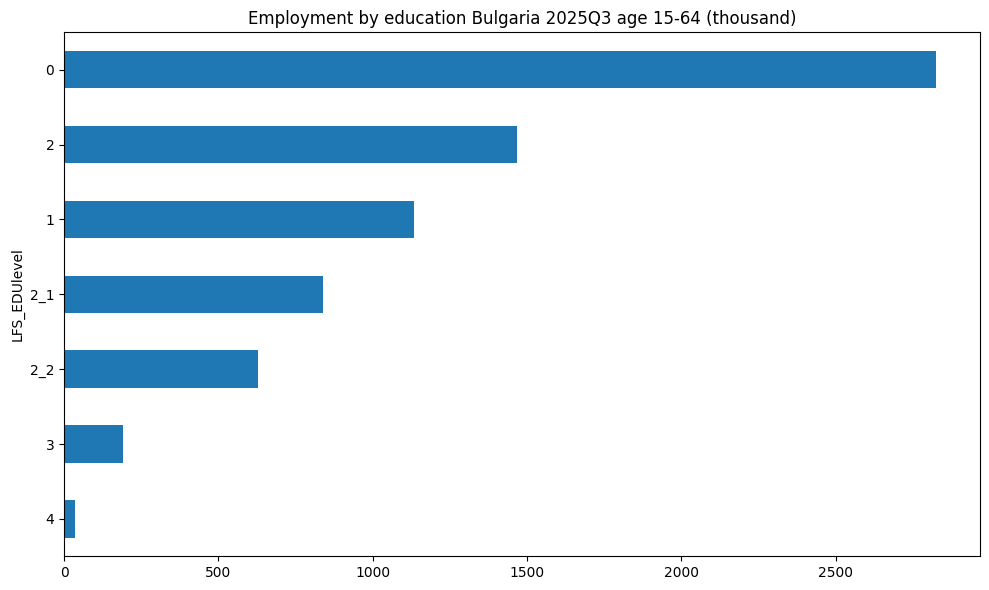

LFS_EDUlevel
0      2825.6
2      1466.6
1      1132.5
2_1     839.4
2_2     627.2
3       190.6
4        35.9
Name: ValueColumn, dtype: float64


In [13]:
top = (
    edu_last.groupby("LFS_EDUlevel")["ValueColumn"]
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))
top.sort_values().plot(kind="barh")
plt.title(f"Employment by education Bulgaria {last_period} age 15-64 (thousand)")
plt.tight_layout()
plt.savefig("../reports/figures/nsi_employment_by_education_15_64.png")
plt.show()

print(top)


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df_region = pd.read_csv(
    "../data/raw/nsi_employment_15_64_by_region.csv",
    encoding="utf-8-sig"
)

print(df_region.head())
print(df_region.shape)


  RevisionColumn NUTS   Units periods  GenderID  ValueColumn
0            r_2   BG  1000cp  2003Q1         0       2666.0
1            r_2   BG  1000cp  2003Q1         1       1395.1
2            r_2   BG  1000cp  2003Q1         2       1270.9
3            r_2   BG  1000cp  2003Q2         0       2818.7
4            r_2   BG  1000cp  2003Q2         1       1486.0
(9555, 6)


In [15]:
df_region["periods"] = df_region["periods"].astype(str).str.strip()

last_period = df_region["periods"].max()
print("last period:", last_period)

print("unique NUTS sample:", df_region["NUTS"].astype(str).str.strip().unique()[:30])
print("unique GenderID:", sorted(df_region["GenderID"].unique()))


last period: 2025Q3
unique NUTS sample: <StringArray>
[   'BG',  'BG31', 'BG311', 'BG313', 'BG315', 'BG312', 'BG314',  'BG32',
 'BG321', 'BG322', 'BG324', 'BG323', 'BG325',  'BG33', 'BG331', 'BG332',
 'BG334', 'BG333',  'BG34', 'BG341', 'BG342', 'BG344', 'BG343',  'BG41',
 'BG413', 'BG415', 'BG414', 'BG412', 'BG411',  'BG42']
Length: 30, dtype: str
unique GenderID: [np.int64(0), np.int64(1), np.int64(2)]


rows nuts2_last: 6
      NUTS  ValueColumn
9519  BG41        981.9
9537  BG42        542.7
9504  BG34        402.4
9489  BG33        373.5
9471  BG32        276.4
9453  BG31        248.6


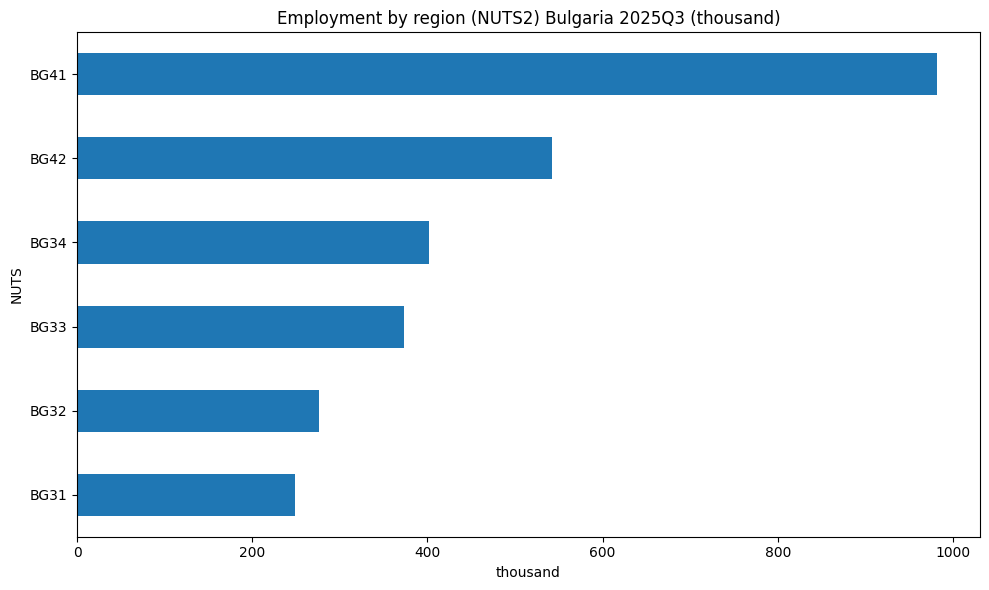

saved: ../reports/figures/nsi_employment_by_region_nuts2.png


In [16]:
import matplotlib.pyplot as plt

# 1) Подготовка
df_region["NUTS"] = df_region["NUTS"].astype(str).str.strip()

last_period = df_region["periods"].max()

# 2) Филтър: последен период, общо (GenderID=0), ниво NUTS2 (дължина 4)
nuts2_last = df_region[
    (df_region["periods"] == last_period) &
    (df_region["GenderID"] == 0) &
    (df_region["NUTS"].str.len() == 4)
].copy()

print("rows nuts2_last:", len(nuts2_last))
print(nuts2_last[["NUTS", "ValueColumn"]].sort_values("ValueColumn", ascending=False))

# 3) Серия за графика
top = (
    nuts2_last.set_index("NUTS")["ValueColumn"]
    .sort_values(ascending=True)
)

# 4) Графика
plt.figure(figsize=(10, 6))
top.plot(kind="barh")
plt.title(f"Employment by region (NUTS2) Bulgaria {last_period} (thousand)")
plt.xlabel("thousand")
plt.tight_layout()

out_path = "../reports/figures/nsi_employment_by_region_nuts2.png"
plt.savefig(out_path)
plt.show()

print("saved:", out_path)


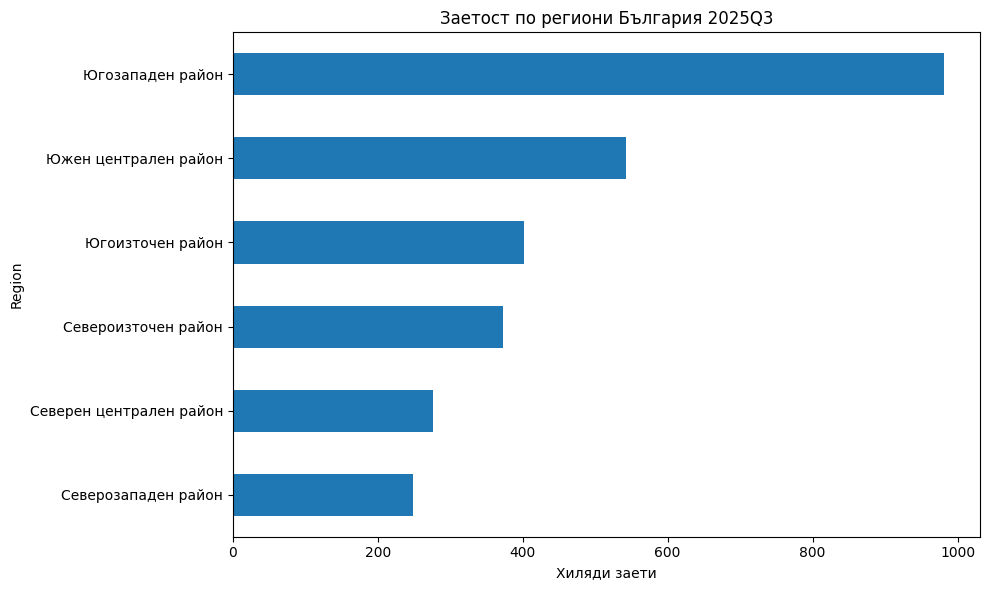

In [17]:
region_map = {
    "BG31": "Северозападен район",
    "BG32": "Северен централен район",
    "BG33": "Североизточен район",
    "BG34": "Югоизточен район",
    "BG41": "Югозападен район",
    "BG42": "Южен централен район"
}

nuts2_last["Region"] = nuts2_last["NUTS"].map(region_map)

top = (
    nuts2_last.set_index("Region")["ValueColumn"]
    .sort_values()
)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
top.plot(kind="barh")
plt.title(f"Заетост по региони България {last_period}")
plt.xlabel("Хиляди заети")
plt.tight_layout()
plt.savefig("../reports/figures/nsi_employment_regions_named.png")
plt.show()


In [18]:
edu_map = {
    "0": "Общо заети",
    "1": "Ниско образование",
    "2": "Средно образование",
    "2_1": "Средно общо",
    "2_2": "Средно професионално",
    "3": "Висше бакалавър",
    "4": "Висше магистър/доктор"
}

edu_last["Education"] = edu_last["LFS_EDUlevel"].map(edu_map)


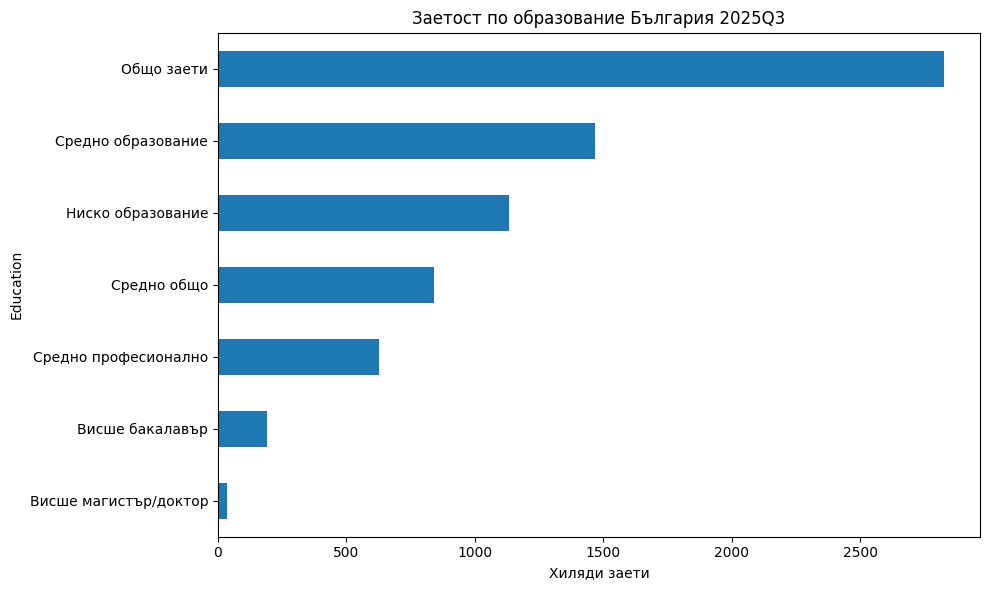

In [19]:
top = (
    edu_last.groupby("Education")["ValueColumn"]
    .sum()
    .sort_values()
)

plt.figure(figsize=(10,6))
top.plot(kind="barh")
plt.title(f"Заетост по образование България {last_period}")
plt.xlabel("Хиляди заети")
plt.tight_layout()
plt.savefig("../reports/figures/nsi_employment_by_education_named.png")
plt.show()


In [20]:
nuts2_last = nuts2_last[nuts2_last["Region"].notna()]


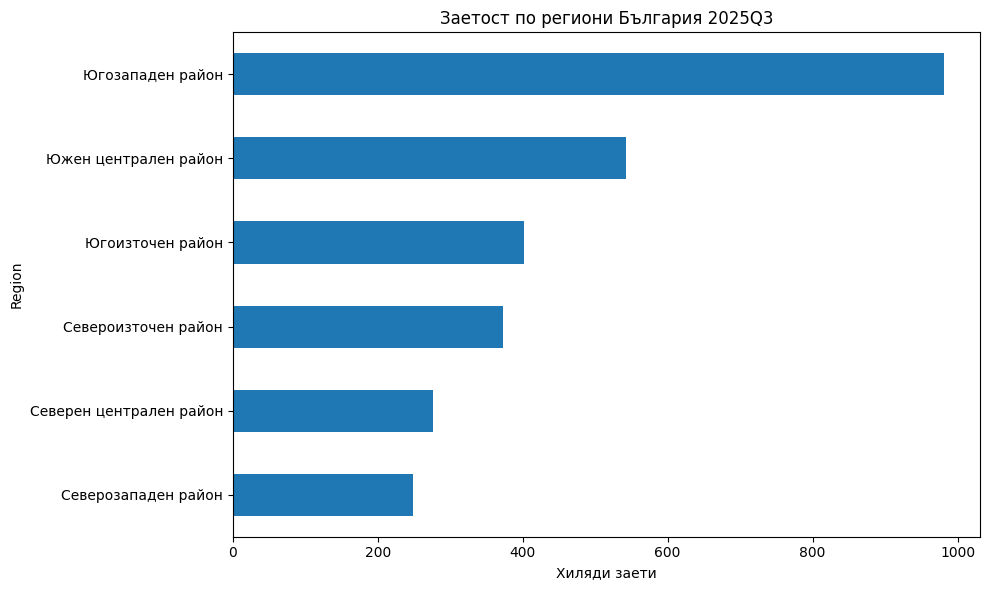

In [21]:
top = nuts2_last.set_index("Region")["ValueColumn"].sort_values()

plt.figure(figsize=(10,6))
top.plot(kind="barh")
plt.title(f"Заетост по региони България {last_period}")
plt.xlabel("Хиляди заети")
plt.tight_layout()
plt.savefig("../reports/figures/nsi_regions_named_final.png")
plt.show()


In [22]:
sector_map = {
    "A": "Земеделие",
    "C": "Преработваща промишленост",
    "F": "Строителство",
    "G": "Търговия",
    "H": "Транспорт",
    "I": "Хотели и ресторанти",
    "M": "Професионални дейности",
    "O": "Държавно управление",
    "P": "Образование",
    "Q": "Здравеопазване"
}

sector_last["Sector"] = sector_last["NACE2008A21"].map(sector_map)


NameError: name 'sector_last' is not defined

In [23]:
last_period = sector["periods"].max()

sector_last = (
    sector[sector["periods"] == last_period]
    .query("GenderID == 0")
)


NameError: name 'sector' is not defined

In [24]:
last_period = sector["periods"].max()

sector_last = (
    sector[sector["periods"] == last_period]
    .query("GenderID == 0")
)


NameError: name 'sector' is not defined

In [25]:
import pandas as pd

sector = pd.read_csv(
    "../data/raw/nsi_employment_by_sector.csv",
    encoding="utf-8",
    sep=","
)

sector.head()


,RevisionColumn,NACE2008A21,Units,periods,GenderID,ValueColumn
0,r_3,0,1000cp,2008Q1,0,3289.9
1,r_3,0,1000cp,2008Q1,1,1749.1
2,r_3,0,1000cp,2008Q1,2,1540.7
3,r_3,0,1000cp,2008Q2,0,3372.1
4,r_3,0,1000cp,2008Q2,1,1794.4


In [26]:
last_period = sector["periods"].max()

sector_last = (
    sector[sector["periods"] == last_period]
    .query("GenderID == 0")
)


In [27]:
sector_map = {
    "A": "Земеделие",
    "C": "Преработваща промишленост",
    "F": "Строителство",
    "G": "Търговия",
    "H": "Транспорт",
    "I": "Хотели и ресторанти",
    "M": "Професионални дейности",
    "O": "Държавно управление",
    "P": "Образование",
    "Q": "Здравеопазване"
}

sector_last["Sector"] = sector_last["NACE2008A21"].map(sector_map)


TypeError: no numeric data to plot

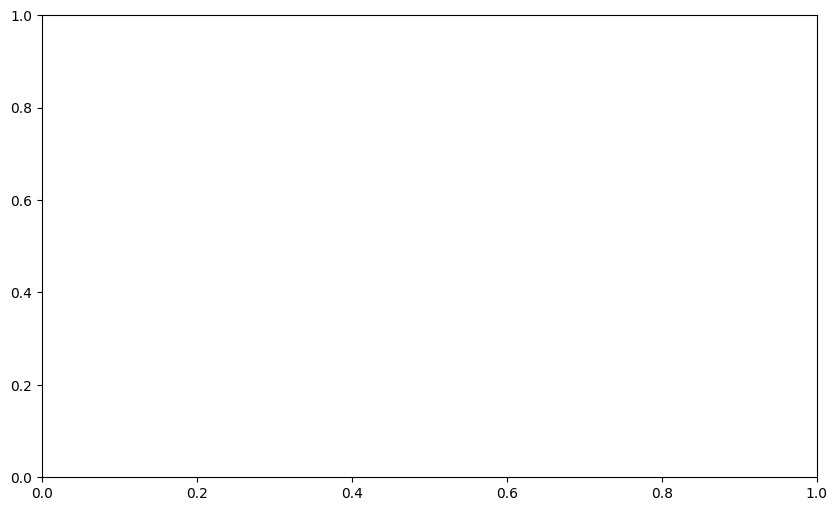

In [28]:
top = (
    sector_last.groupby("Sector")["ValueColumn"]
    .sum()
    .sort_values()
)

plt.figure(figsize=(10,6))
top.plot(kind="barh")
plt.title(f"Заетост по икономически сектори България {last_period}")
plt.xlabel("Хиляди заети")
plt.tight_layout()
plt.savefig("../reports/figures/nsi_sectors_named.png")
plt.show()


In [29]:
sector["ValueColumn"] = pd.to_numeric(sector["ValueColumn"], errors="coerce")


In [30]:
last_period = sector["periods"].max()

sector_last = (
    sector[sector["periods"] == last_period]
    .query("GenderID == 0")
)

sector_last["Sector"] = sector_last["NACE2008A21"].map(sector_map)

top = (
    sector_last.groupby("Sector")["ValueColumn"]
    .sum()
    .sort_values()
)


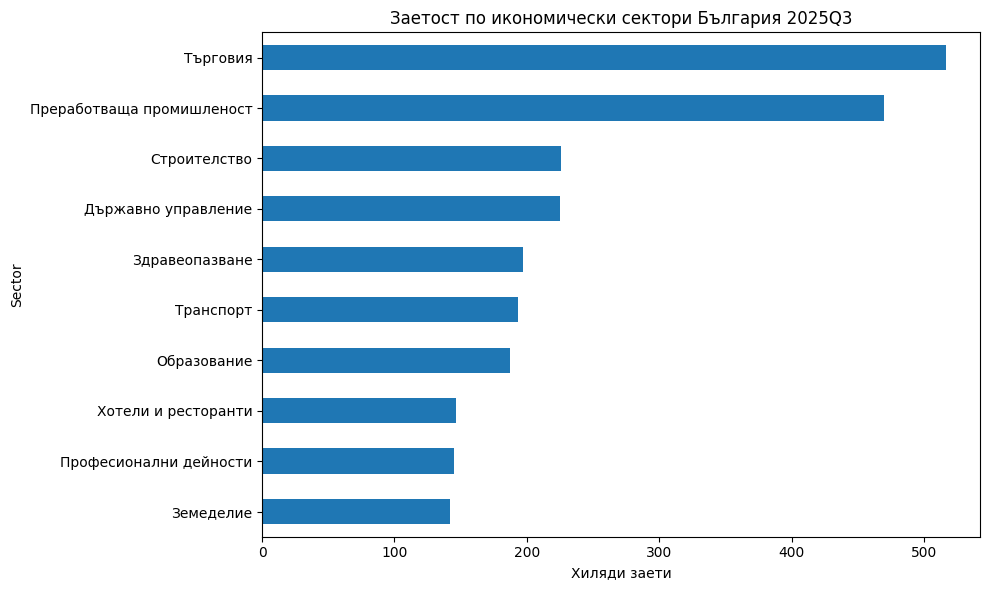

In [31]:
plt.figure(figsize=(10,6))
top.plot(kind="barh")
plt.title(f"Заетост по икономически сектори България {last_period}")
plt.xlabel("Хиляди заети")
plt.tight_layout()
plt.savefig("../reports/figures/nsi_top_sectors_named.png")
plt.show()
